# 2015 US Traffic Fatalities Study

Introduction: 

The United States is the country that built upon wheels. Overall, an estimate of 263.6 million passenger vehicles were registered in 2015. According to NHTSA’s (National Highway Traffic Safety Administration) reports, roughly 40,200 people died in accidents involving motor vehicles in 2015. Thus, Safety & Driving should be very concerned.

Our research is focused on the number of fatality cases and event-related variables in 2015. The purpose of the project is to develop a model that reveals the leading factors of fatality cases and thus prevents further accidents. 

# Generalized Linear Model

Overall summary: 

Because the dependent variable is the count of deaths involved in the crash, the application of Poisson family frist comes to our mind. However, after reviewing the result, we found that most of independent variables are insignificant. Under the guidance of professor, we decided to switch to quasi-poisson family.

## 1.1 Load relevant libraries 

In [2]:
library(dplyr)
library(readr)
library(magrittr)
library(ggplot2)
library(brms)
library("IRdisplay")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Rcpp
Loading 'brms' package (version 1.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').
Plotting theme set to bayesplot::theme_default().


## 1.2 Show the variable table

We use SQL to realize data preprocessing

Data Cleaning: Listwise delete the records within N/A and unreported, and remove irrelevant columns

Data Integration: Aggregate some vehicle-based independent variables to a case level, which including several vehicles

Data Transformation: Dummy coding some categorical variables into K-1 columns

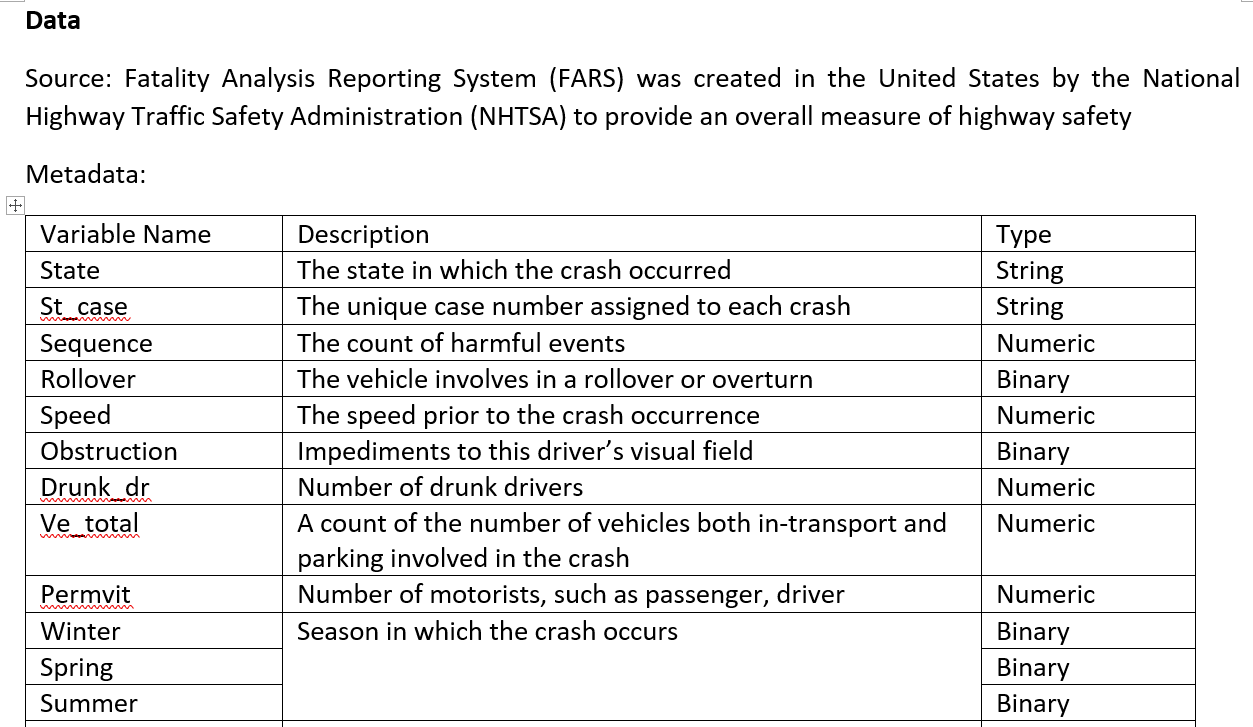

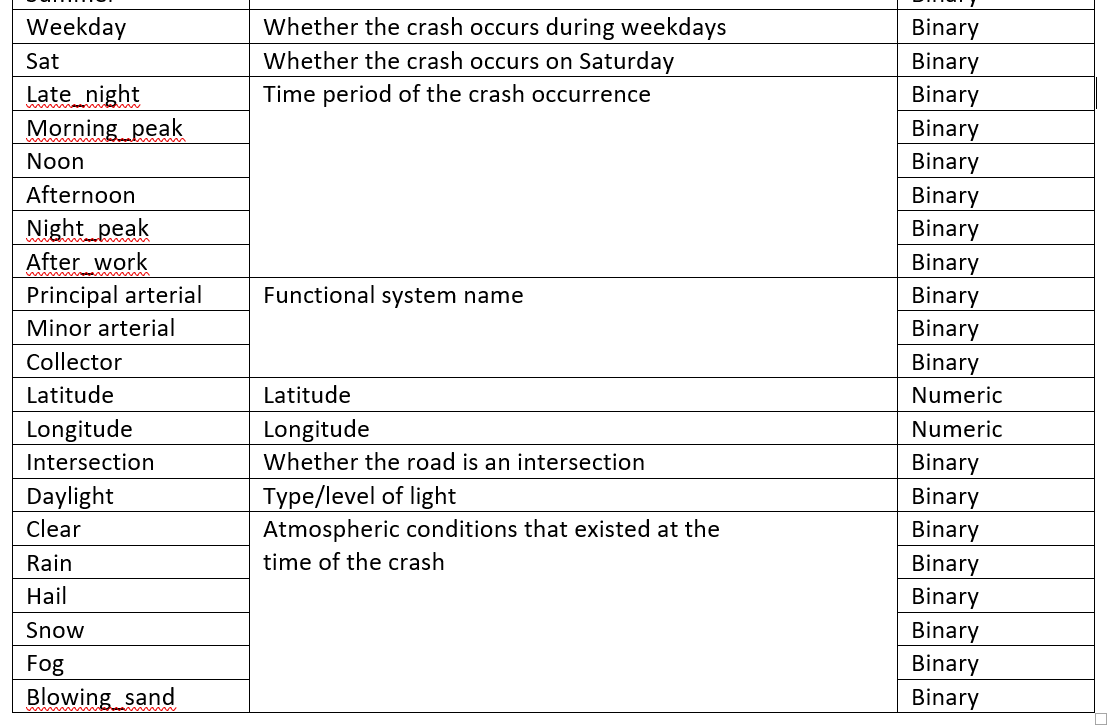

In [8]:
display_png(file="vartable1.png")
display_png(file="vartable2.png")

## 1.3 Show some visualization from Tableau

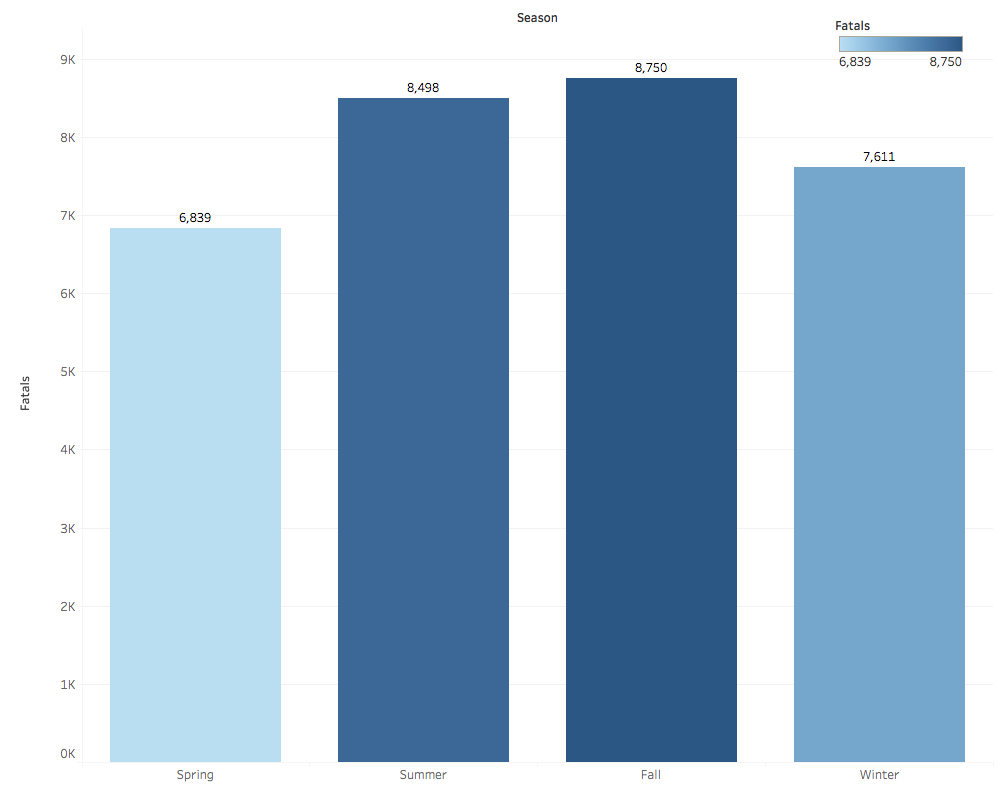

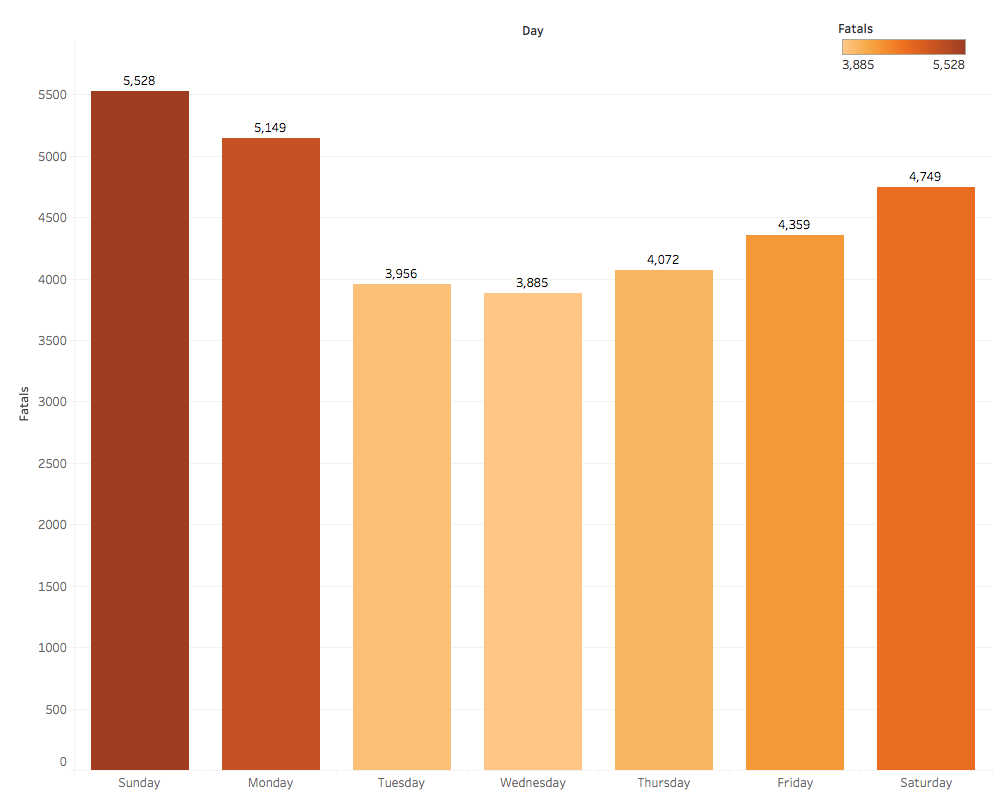

In [5]:
display_png(file="season.png")
display_png(file="traffic.png")

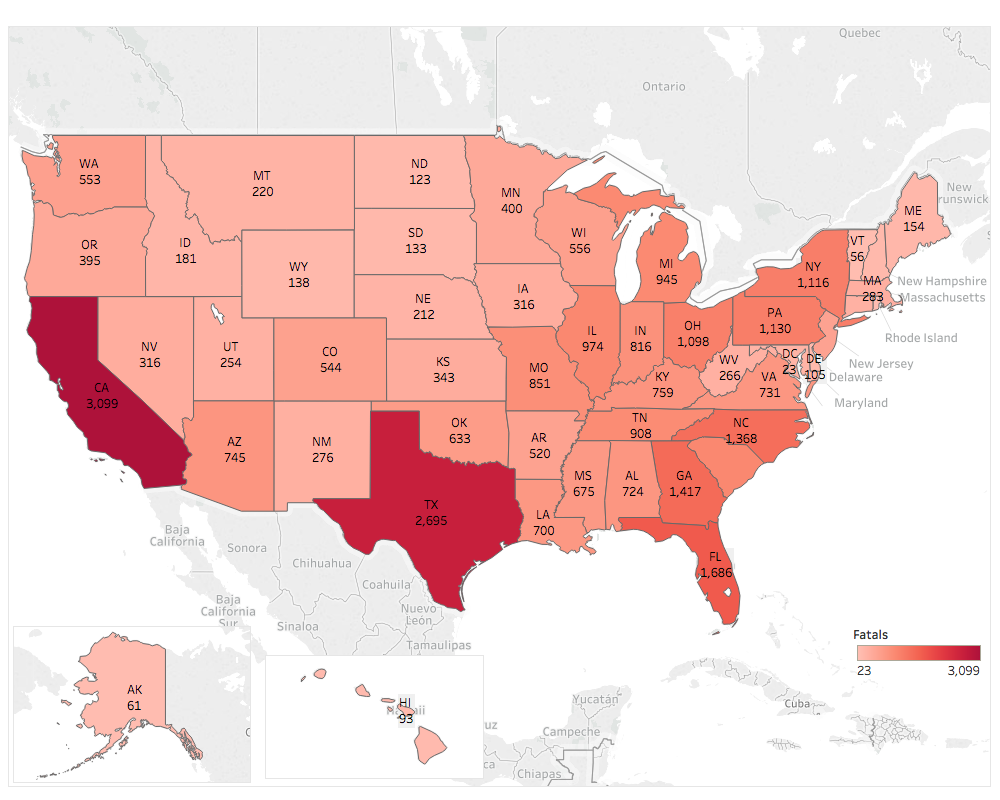

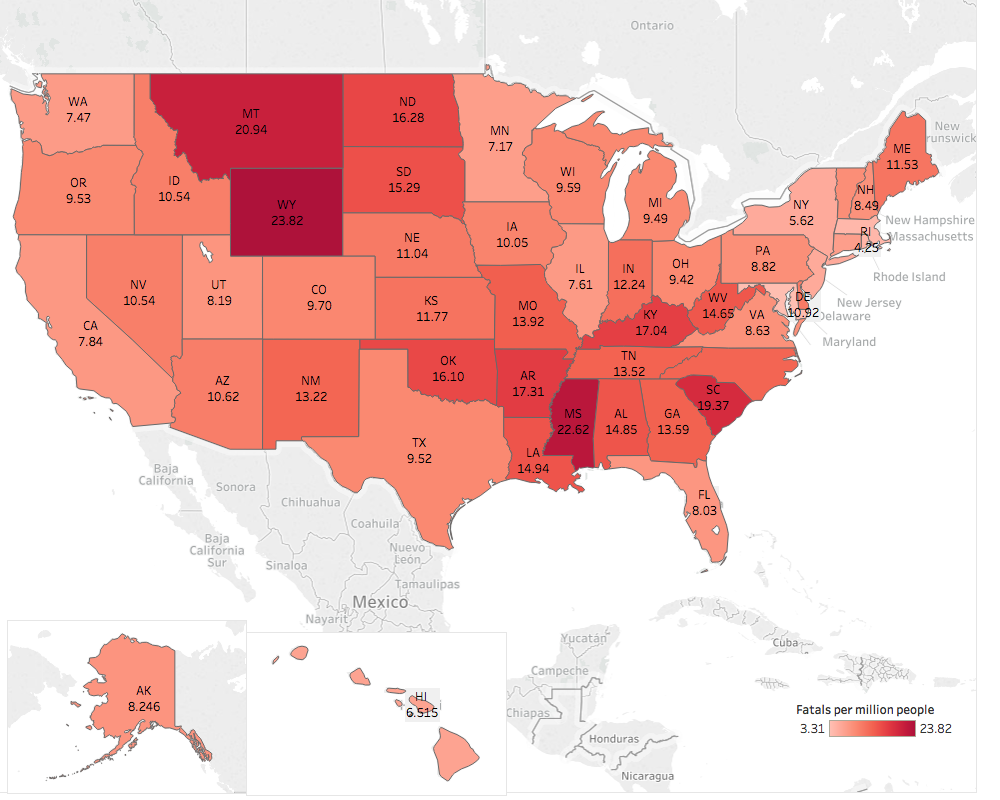

In [4]:
display_png(file="geo-map.png")
display_png(file="geo-portion.png")

# the upper one is the total crash deaths across the states
# the lower one is the total crash deaths per million people

## 1.4 Further check for the visualizations

By looking at the bar charts from Tableau, audience might think there is significant difference between the taffic day and normal day, as well as things come to the different sesaons.

However, there might be a misleading message sent by the color and layout of visualization

In the following step, we extract some subgroups from the dataset, and conduct t-test to judge whether there is significant difference across the groups


In [30]:
descrip_data <- read.csv("2015 US TRAFFIC FATALS BRMS APR24.csv")

In [31]:
colnames(descrip_data)

[1] "FATALS"             "STATE"              "ST_CASE"           
 [4] "Sequence"           "ROLLOVER"           "SPEED"             
 [7] "Obstruction"        "DRUNK_DR"           "VE_TOTAL"          
[10] "VE_FORMS"           "PERMVIT"            "Principal.Arterial"
[13] "Minor.Arterial"     "Collector"          "Intersection"      
[16] "Daylight"           "Region"             "Season"            
[19] "Weather"            "Day"                "period"            
[22] "Winter"             "Spring"             "Summer"            
[25] "WEEKDAY"            "SAT"                "morning_peak"      
[28] "night_peak"         "after_work"         "noon"              
[31] "afternoon"          "LATITUDE"           "LONGITUD"          
[34] "Clear"              "Rain"               "Hail"              
[37] "Snow"               "Fog"                "Blowing_sand"

In [28]:
summary(descrip_data$Day)
summary(descrip_data$Season)

Normal Day Traffic Day 
       6061        3662

Fall Spring Summer Winter 
  2622   2206   2581   2314

In [29]:
normalday_data<-descrip_data[descrip_data$Day == "Normal Day", , drop=FALSE]
trafficday_data<-descrip_data[descrip_data$Day == "Traffic Day", , drop=FALSE]
spring_data<-descrip_data[descrip_data$Season == "Spring", , drop=FALSE]
fall_data<-descrip_data[descrip_data$Season == "Fall", , drop=FALSE]

In [32]:
summary(trafficday_data$Day)
summary(normalday_data$Day)
summary(spring_data$Season)
nrow(normalday_data)

Normal Day Traffic Day 
          0        3662

Normal Day Traffic Day 
       6061           0

Fall Spring Summer Winter 
     0   2206      0      0

[1] 6061

## 1.5 T-test results

ALL the T-test indicate that there is no significant difference across the groups, even though it seems like it does in the bar charts

However, the explanations might be: the means of subgroups are not significantly different because the whole dataset is averaged around 1. 

In [33]:
t.test(spring_data$FATALS,fall_data$FATALS)


	Welch Two Sample t-test

data:  spring_data$FATALS and fall_data$FATALS
t = -0.17539, df = 4577.7, p-value = 0.8608
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02340346  0.01955984
sample estimates:
mean of x mean of y 
 1.088849  1.090770 


In [17]:
t.test(normalday_data$FATALS,trafficday_data$FATALS)


	Welch Two Sample t-test

data:  normalday_data$FATALS and trafficday_data$FATALS
t = 1.0483, df = 7659, p-value = 0.2945
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007080898  0.023359149
sample estimates:
mean of x mean of y 
 1.094704  1.086565 


In [20]:
t.test(normalday_data$FATALS,trafficday_data$FATALS,var.equal=TRUE)


	Two Sample t-test

data:  normalday_data$FATALS and trafficday_data$FATALS
t = 1.0509, df = 9721, p-value = 0.2934
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007043155  0.023321406
sample estimates:
mean of x mean of y 
 1.094704  1.086565 


## 2.1 Load the data and summary 

In [4]:
traffic_data <- read.csv("2015 US TRAFFIC FATALS APR 24.csv")

In [5]:
colnames(traffic_data)

[1] "row.ID"             "FATALS"             "STATE"             
 [4] "ST_CASE"            "Sequence"           "ROLLOVER"          
 [7] "SPEED"              "Obstruction"        "DRUNK_DR"          
[10] "VE_TOTAL"           "VE_FORMS"           "PERMVIT"           
[13] "Winter"             "Spring"             "Summer"            
[16] "WEEKDAY"            "SAT"                "morning_peak"      
[19] "night_peak"         "after_work"         "noon"              
[22] "afternoon"          "Principal.Arterial" "Minor.Arterial"    
[25] "Collector"          "LATITUDE"           "LONGITUD"          
[28] "Intersection"       "Daylight"           "Clear"             
[31] "Rain"               "Hail"               "Snow"              
[34] "Fog"                "Blowing_sand"

In [11]:
head(traffic_data,10)

row.ID,FATALS,STATE,ST_CASE,Sequence,ROLLOVER,SPEED,Obstruction,DRUNK_DR,VE_TOTAL,...,LATITUDE,LONGITUD,Intersection,Daylight,Clear,Rain,Hail,Snow,Fog,Blowing_sand
Row0_Row24,2,1,10025,4,0,95,0,1,1,...,33.08891,-87.67460,0,0,1,0,0,0,0,0
Row1_Row28,1,1,10029,3,0,65,0,0,1,...,31.16131,-85.19056,1,0,0,1,0,0,0,0
Row2_Row29,5,1,10030,5,1,96,0,0,2,...,32.78083,-86.47020,0,1,1,0,0,0,0,0
Row3_Row30,1,1,10031,1,0,40,0,0,1,...,33.92139,-87.86725,1,0,1,0,0,0,0,0
Row4_Row31,1,1,10032,4,1,65,0,1,1,...,33.74095,-85.88292,0,0,1,0,0,0,0,0
Row5_Row32,2,1,10033,2,0,45,0,1,1,...,32.87645,-85.87762,0,0,0,1,0,0,0,0
Row6_Row33,1,1,10034,5,0,78,0,1,6,...,30.65516,-87.90710,1,1,0,0,0,0,0,0
Row7_Row36,1,1,10037,3,0,48,0,0,1,...,30.73177,-87.78451,0,1,1,0,0,0,0,0
Row8_Row40,1,1,10041,2,0,70,0,1,1,...,34.37793,-85.75579,0,0,1,0,0,0,0,0
Row9_Row41,1,1,10042,1,0,60,0,0,1,...,33.10607,-87.46707,1,0,1,0,0,0,0,0


In [12]:
tail(traffic_data,10)

,row.ID,FATALS,STATE,ST_CASE,Sequence,ROLLOVER,SPEED,Obstruction,DRUNK_DR,VE_TOTAL,...,LATITUDE,LONGITUD,Intersection,Daylight,Clear,Rain,Hail,Snow,Fog,Blowing_sand
9714,Row9713_Row32152,2,56,560117,6,1,65,0,1,1,...,43.12465,-107.3710,0,0,1,0,0,0,0,0
9715,Row9714_Row32153,1,56,560118,1,0,80,0,0,1,...,41.79403,-104.7920,0,0,1,0,0,0,0,0
9716,Row9715_Row32154,1,56,560119,5,1,75,0,1,2,...,43.08280,-108.3787,0,1,1,0,0,0,0,0
9717,Row9716_Row32155,1,56,560120,1,1,50,0,1,1,...,41.30779,-110.1998,0,0,1,0,0,0,0,0
9718,Row9717_Row32157,1,56,560122,5,1,85,0,1,2,...,41.60670,-109.1442,0,1,1,0,0,0,0,0
9719,Row9718_Row32158,1,56,560123,1,0,55,0,0,1,...,43.42580,-110.7780,0,0,1,0,0,0,0,0
9720,Row9719_Row32159,1,56,560124,3,1,75,0,0,1,...,44.87630,-106.9988,0,0,1,0,0,0,0,0
9721,Row9720_Row32160,1,56,560125,3,1,96,0,0,2,...,41.54180,-105.6755,0,0,1,0,0,0,0,0
9722,Row9721_Row32161,2,56,560126,2,0,65,0,0,2,...,42.56220,-107.0246,0,0,1,0,0,0,0,0
9723,Row9722_Row32162,1,56,560127,3,1,90,0,1,1,...,41.05648,-104.7956,1,0,1,0,0,0,0,0


In [13]:
summary(traffic_data)

             row.ID         FATALS          STATE          ST_CASE      
 Row0_Row24     :   1   Min.   :1.000   Min.   : 1.00   Min.   : 10001  
 Row1_Row28     :   1   1st Qu.:1.000   1st Qu.: 8.00   1st Qu.: 80481  
 Row10_Row42    :   1   Median :1.000   Median :29.00   Median :290085  
 Row100_Row168  :   1   Mean   :1.092   Mean   :26.62   Mean   :266881  
 Row1000_Row2432:   1   3rd Qu.:1.000   3rd Qu.:42.00   3rd Qu.:420517  
 Row1001_Row2433:   1   Max.   :8.000   Max.   :56.00   Max.   :560127  
 (Other)        :9717                                                   
    Sequence         ROLLOVER          SPEED         Obstruction     
 Min.   : 1.000   Min.   :0.0000   Min.   :  0.00   Min.   :0.00000  
 1st Qu.: 1.000   1st Qu.:0.0000   1st Qu.: 45.00   1st Qu.:0.00000  
 Median : 3.000   Median :0.0000   Median : 55.00   Median :0.00000  
 Mean   : 3.189   Mean   :0.2557   Mean   : 55.92   Mean   :0.07991  
 3rd Qu.: 4.000   3rd Qu.:1.0000   3rd Qu.: 65.00   3rd Qu.:0.0000

## 2.2 Drop the irrelevant columns 

In [14]:
drop.cols = c("ST_CASE", "STATE"，"row.ID")
traffic_data <- traffic_data %>% select(-one_of(drop.cols)) #this <- is the re-assignment

In [15]:
names(traffic_data)

[1] "FATALS"             "Sequence"           "ROLLOVER"          
 [4] "SPEED"              "Obstruction"        "DRUNK_DR"          
 [7] "VE_TOTAL"           "VE_FORMS"           "PERMVIT"           
[10] "Winter"             "Spring"             "Summer"            
[13] "WEEKDAY"            "SAT"                "morning_peak"      
[16] "night_peak"         "after_work"         "noon"              
[19] "afternoon"          "Principal.Arterial" "Minor.Arterial"    
[22] "Collector"          "LATITUDE"           "LONGITUD"          
[25] "Intersection"       "Daylight"           "Clear"             
[28] "Rain"               "Hail"               "Snow"              
[31] "Fog"                "Blowing_sand"

## 3 Split the dataset into training and validation parts

In [16]:
smp_size <- floor(0.7*nrow(traffic_data))
set.seed(12345)
train_ind <- sample(seq_len(nrow(traffic_data)), size = smp_size)
training.data <- traffic_data[train_ind,]
testing.data <- traffic_data[-train_ind,]

## 4.1 Run the GLM model

In [17]:
fullmodel <- glm(FATALS ~., 
                 family=quasipoisson(link="log"), data = training.data )
summary(fullmodel)  # quasi-poisson



Call:
glm(formula = FATALS ~ ., family = quasipoisson(link = "log"), 
    data = training.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8781  -0.1111  -0.0589  -0.0112   3.4604  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.1290338  0.0393032  -3.283  0.00103 ** 
Sequence            0.0057936  0.0020681   2.801  0.00510 ** 
ROLLOVER           -0.0106540  0.0099720  -1.068  0.28538    
SPEED               0.0017895  0.0002361   7.580 3.91e-14 ***
Obstruction         0.0411133  0.0141224   2.911  0.00361 ** 
DRUNK_DR            0.0441822  0.0087105   5.072 4.04e-07 ***
VE_TOTAL           -0.0249044  0.0165782  -1.502  0.13308    
VE_FORMS           -0.0092589  0.0176389  -0.525  0.59966    
PERMVIT             0.0439585  0.0018680  23.532  < 2e-16 ***
Winter             -0.0083227  0.0107449  -0.775  0.43862    
Spring             -0.0186361  0.0107685  -1.731  0.08357 .  
Summer             -0.0053688 

The SPEED here has a minimum effect on the number of deaths (very small coefficient) might have two explanations: 1) because these cases are death cases, that means the drivers have already rided at a higher speed, the marginal increase of speed might not be significant; 2) the distribution of fatals shows that the mean is around 1, that means most of cases are single-driver

## No stepwise model selection because quasi-poisson doesn't have AIC

In [18]:
#?step
#backward <- step(fullmodel)  
# for quasi-posisson model, there is NO AIC,thus no selection method as well

In [19]:
formula(fullmodel)

FATALS ~ Sequence + ROLLOVER + SPEED + Obstruction + DRUNK_DR + 
    VE_TOTAL + VE_FORMS + PERMVIT + Winter + Spring + Summer + 
    WEEKDAY + SAT + morning_peak + night_peak + after_work + 
    noon + afternoon + Principal.Arterial + Minor.Arterial + 
    Collector + LATITUDE + LONGITUD + Intersection + Daylight + 
    Clear + Rain + Hail + Snow + Fog + Blowing_sand

## 4.2 Plot the residuals and check assumption 

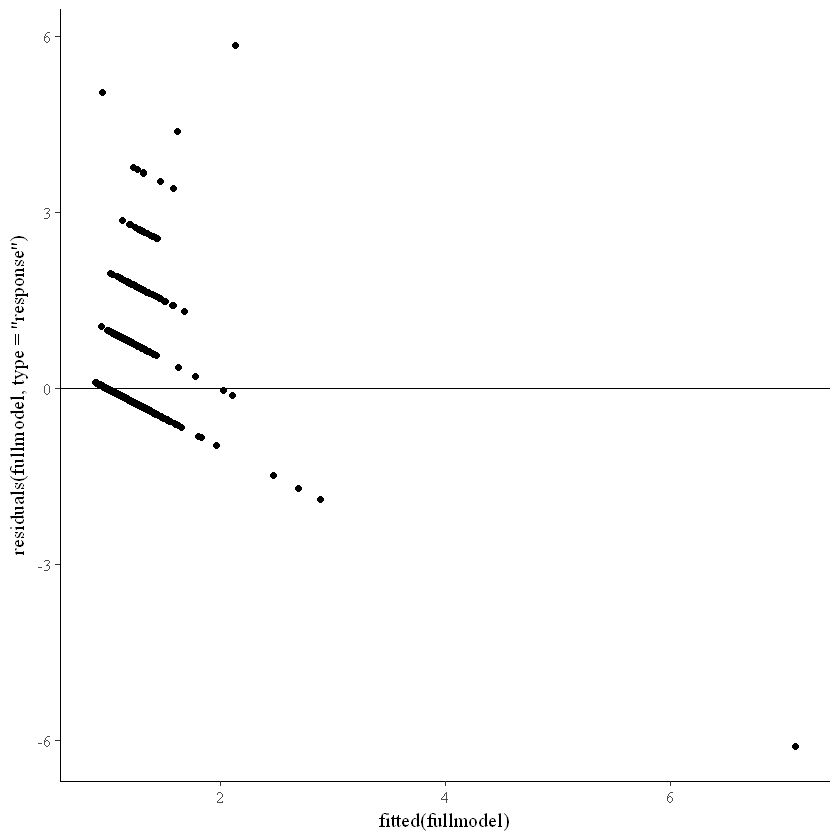

In [20]:
qplot(fitted(fullmodel), residuals(fullmodel, type="response")) + geom_hline(yintercept=0)

#response residual is the diff between the predicted and actual dependent var
# there is some jumps, because the dependent is the number of death, which is not continuous
# there are condensing or clustering around 1 (predicted value) is because 
#there are always more data spots within lower interval

The "jump" here is because the dependent variable is the number of death, which is not continuous variable

In [21]:

"Several kinds of residuals can be defined for GLMs:

response:  yi−μ^i 
Pearson:
rPi=yi−μ^iV(μ^i)−−−−−√
 
deviance:  rDi  is the contribution of the observation to the log-likelihood function.

These definitions are all equivalent for Normal models.

Each of these types of residuals can be squared and added together to create an RSS-like statistic:

response: RSS
Pearson:  ∑i(rPi)2  equals the generalized Pearson statistic
deviance:  ∑i(rDi)2  equals the Deviance of the model
In principle, both statistics could be compared to the  χ2n−p  distribution as a rough goodness of fit test.
However, this test does not actually work very well.
Several modifications have been proposed especially for binary data (logistic regression), 
including an early test proposed by Hosmer and Lemeshow that remains popular. 
Other, better tests have been proposed as well (an extensive comparison was made by Hosmer et al. (1997)). 
These tests are available in R using for example the generalhoslem package."


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "Several kinds of residuals can be defined for GLMs:\n\nresponse:  yi-µ^i \nPearson:\nrPi=yi-µ^iV(µ^i)-----v\n \ndeviance:  rDi  is the contribution of the observation to the log-likelihood function.\n\nThese definitions are all equivalent for Normal models.\n\nEach of these types of residuals can be squared and added together to create an RSS-like statistic:\n\nresponse: RSS\nPearson:  <U+2211>i(rPi)2  equals the generalized Pearson statistic\ndeviance:  <U+2211>i(rDi)2  equals the Deviance of the model\nIn principle, both statistics could be compared to the  <U+03C7>2n-p  distribution as a rough goodness of fit test.\nHowever, this test does not actually work very well.\nSeveral modifications have been proposed especially for binary data (logistic regression), \nincluding an early test proposed by Hosmer and Lemeshow that remains popular. \nOther, better tests have been proposed as well (an extensive comparison was made by Hosmer et al. (1997)). \nThese tests are available in R using for example the generalhoslem package."

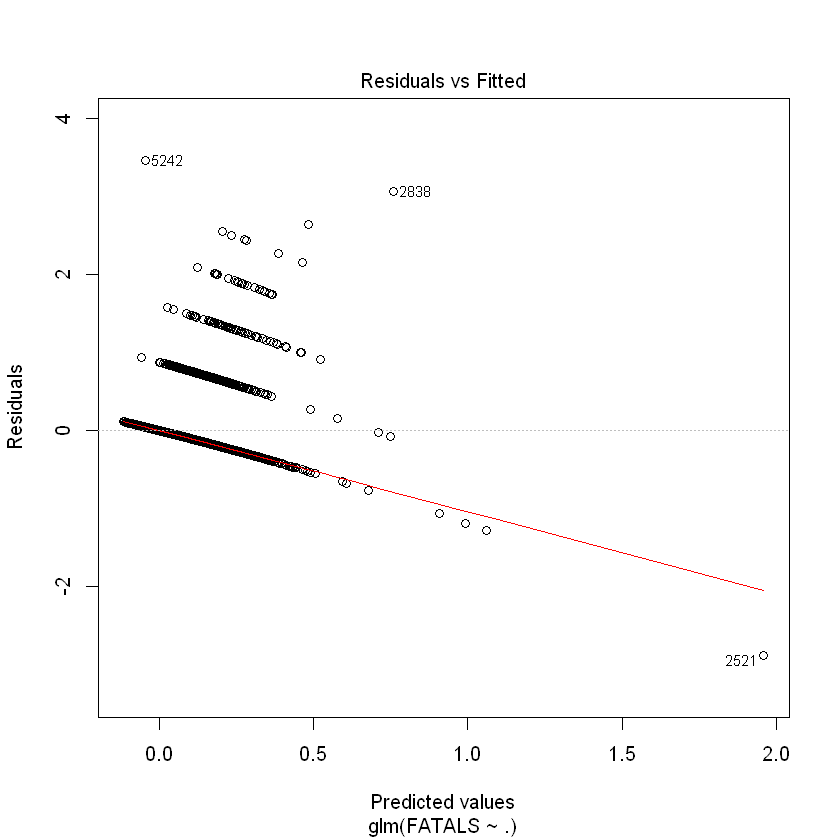

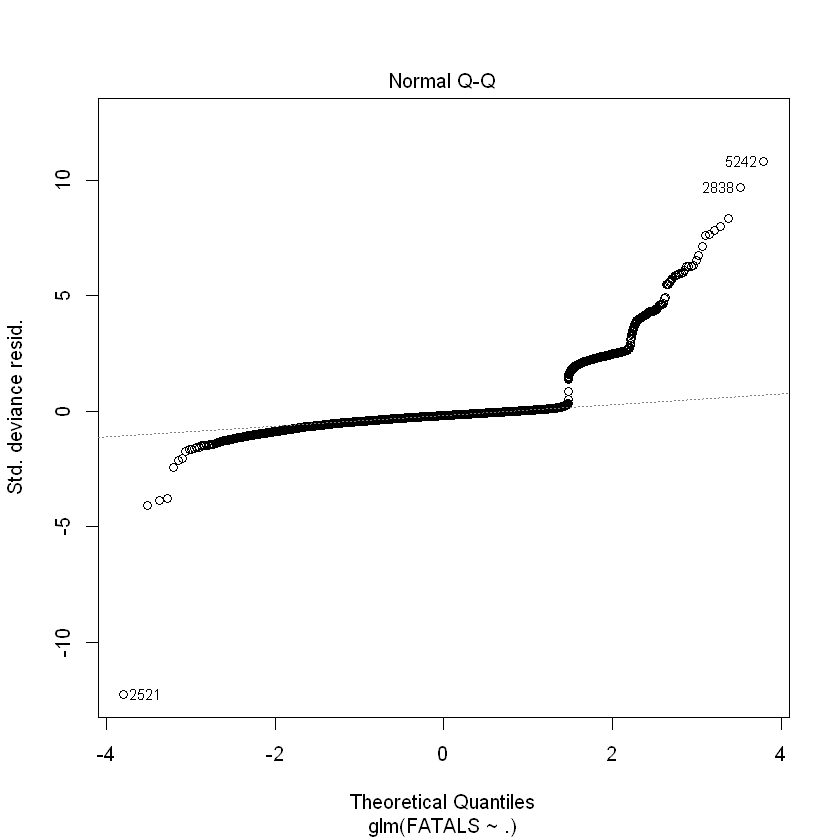

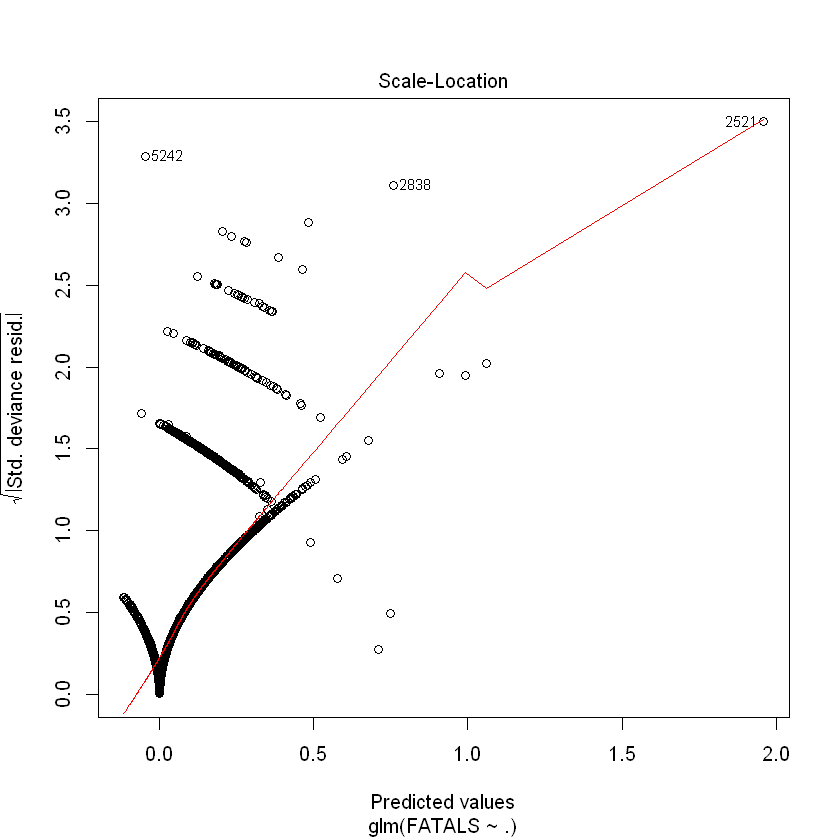

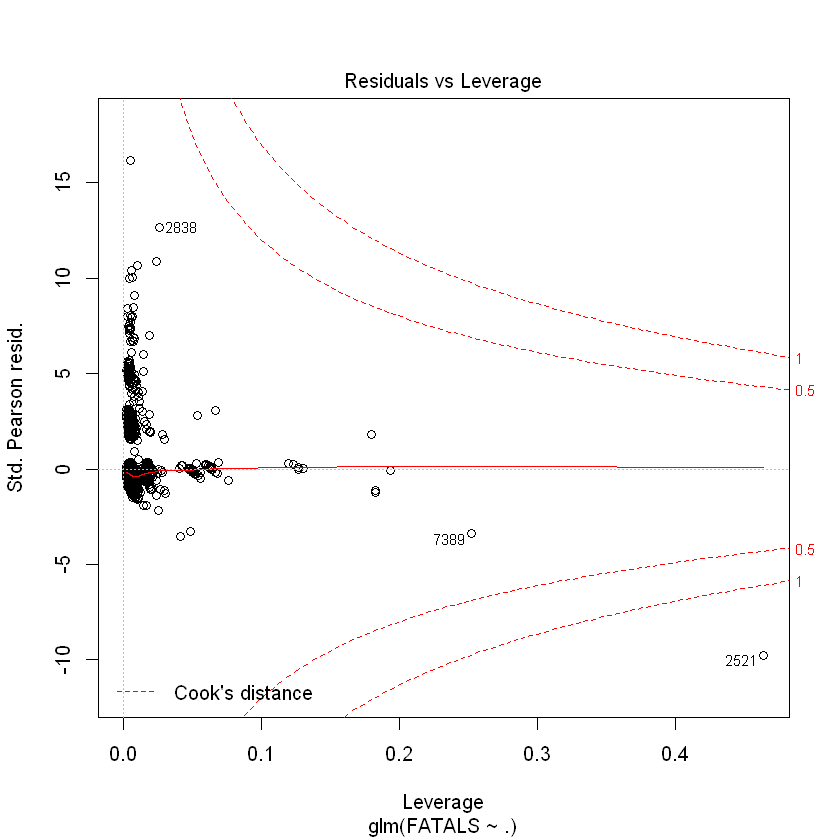

In [22]:
plot(fullmodel)

QQ plot shows a tail, which needs our further concern. The explanation might be the majority of the cases are around 1 death in crash. Thus, there is less information for the cases with large number death, tbe model cannot explain that part so well